In [2]:
import pandas as pd

df = pd.read_parquet('Building Classification/df_hamburg.parquet')

In [4]:
df.head()

,gmlid,latitude,longitude,schema,schema_granular,data_source,building_area,building_type,building_function,has_living_function,...,terrain_pitch_var,terrain_triangle_count,building_age_census,building_age_census_probability,building_age_census_status,building_age_alkis,distance_to_street,distance_to_city,distance_to_border,municipality_name
2954887,DEHHALKA100010dI,53.690294,10.094055,Hamburg,hamburg,citydb,82.447124,Reihenhaus (Ende),Wohnhaus,True,...,0.00,2.0,None,None,None,2010,11.64,0.146815,0.145896,Hamburg
2954888,DEHHALKA10001bXM,53.469230,9.839075,Hamburg,hamburg,citydb,99.420004,Ein-/Mehrfamilienhaus,Wohnhaus,True,...,0.00,2.0,None,None,None,2010,9.88,0.128334,0.161368,Hamburg
2954889,DEHHALKA10003Rw2,53.561675,10.113988,Hamburg,hamburg,citydb,27.519339,None,Garage,False,...,0.00,4.0,None,None,None,2010,15.81,0.058638,0.218858,Hamburg
2954890,DEHHALKA10005JoK,53.467988,10.187066,Hamburg,hamburg,citydb,126.235461,None,Gebäude zur Energieversorgung,False,...,0.00,2.0,None,None,None,2011,51.02,0.126264,0.366051,Hamburg
2954891,DEHHALKA10005xaV,53.566455,9.828951,Hamburg,hamburg,citydb,62.570851,Doppelhaushälfte,Wohnhaus,True,...,1.48,7.0,1949 - 1978,1.0,census,1500,8.05,0.110474,0.147720,Hamburg


In [5]:
df.columns

Index(['gmlid', 'latitude', 'longitude', 'schema', 'schema_granular',
       'data_source', 'building_area', 'building_type', 'building_function',
       'has_living_function', 'family_home', 'is_main_building',
       'building_part_count', 'area', 'perimeter', 'npi', 'npi_norm',
       'footprint_vertices', 'n_neighbour', 'body_volume', 'calculated_gfs',
       'calculated_ls', 'roof_type', 'roof_area', 'roof_coverage',
       'roof_volume', 'roof_surface_count', 'roof_z_min', 'roof_z_max',
       'roof_pitch_mean', 'roof_pitch_min', 'roof_pitch_max', 'roof_pitch_var',
       'roof_triangle_count', 'flat_roof', 'flat_roof_ratio',
       'roof_height_mean', 'roof_height_min', 'roof_height_max',
       'roof_height_relative', 'measured_height', 'storeys_alkis',
       'storeys_model', 'storeys_calculated', 'storeys', 'storeys_source',
       'ceiling_height', 'storeys_under_roof', 'living_space_calculated',
       'gross_floor_space_calculated', 'height_max', 'body_height',
       'hei

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

gmlid                               object
latitude                           float64
longitude                          float64
schema                              object
schema_granular                     object
data_source                         object
building_area                      float64
building_type                       object
building_function                   object
has_living_function                 object
family_home                         object
is_main_building                    object
building_part_count                  int64
area                               float32
perimeter                          float32
npi                                float32
npi_norm                           float32
footprint_vertices                 float64
n_neighbour                        float64
body_volume                        float32
calculated_gfs                     float32
calculated_ls                      float32
roof_type                           object
roof_area  

In [7]:
cols = pd.Series(df.dtypes)

def numeric_cols(cols:pd.Series):

    is_numeric = pd.Series(dtype=bool)

    for i in range(0,len(cols)):
        datatype = cols[i]

        if datatype == 'object':
            is_numeric.at[i] = False
        else:
            is_numeric.at[i] = True

    return is_numeric

num_col = numeric_cols(cols)
print(num_col)

0     False
1      True
2      True
3     False
4     False
      ...  
66    False
67     True
68     True
69     True
70    False
Length: 71, dtype: bool


In [8]:
filtered_cols = cols.loc[num_col.values]
filtered_cols

latitude                        float64
longitude                       float64
building_area                   float64
building_part_count               int64
area                            float32
perimeter                       float32
npi                             float32
npi_norm                        float32
footprint_vertices              float64
n_neighbour                     float64
body_volume                     float32
calculated_gfs                  float32
calculated_ls                   float32
roof_area                       float32
roof_coverage                   float32
roof_volume                     float64
roof_surface_count              float64
roof_z_min                      float32
roof_z_max                      float32
roof_pitch_mean                 float32
roof_pitch_min                  float32
roof_pitch_max                  float32
roof_pitch_var                  float32
roof_triangle_count             float64
flat_roof                       float64


In [9]:
col_names = filtered_cols.index

col_names

Index(['latitude', 'longitude', 'building_area', 'building_part_count', 'area',
       'perimeter', 'npi', 'npi_norm', 'footprint_vertices', 'n_neighbour',
       'body_volume', 'calculated_gfs', 'calculated_ls', 'roof_area',
       'roof_coverage', 'roof_volume', 'roof_surface_count', 'roof_z_min',
       'roof_z_max', 'roof_pitch_mean', 'roof_pitch_min', 'roof_pitch_max',
       'roof_pitch_var', 'roof_triangle_count', 'flat_roof', 'flat_roof_ratio',
       'roof_height_mean', 'roof_height_min', 'roof_height_max',
       'roof_height_relative', 'measured_height', 'storeys_alkis',
       'storeys_model', 'storeys_calculated', 'storeys', 'ceiling_height',
       'storeys_under_roof', 'living_space_calculated',
       'gross_floor_space_calculated', 'height_max', 'body_height',
       'height_mean', 'terrain_height', 'eave_height_mean',
       'ridge_height_mean', 'terrain_surface_area', 'terrain_z_min',
       'terrain_z_median', 'terrain_z_max', 'terrain_pitch_mean',
       'terrain_p

In [10]:
df_new = df.drop(columns=df.columns.difference(col_names, sort=False))
df_new.head()

,latitude,longitude,building_area,building_part_count,area,perimeter,npi,npi_norm,footprint_vertices,n_neighbour,body_volume,calculated_gfs,calculated_ls,roof_area,roof_coverage,roof_volume,roof_surface_count,roof_z_min,roof_z_max,roof_pitch_mean,roof_pitch_min,roof_pitch_max,roof_pitch_var,roof_triangle_count,flat_roof,flat_roof_ratio,roof_height_mean,roof_height_min,roof_height_max,roof_height_relative,measured_height,storeys_alkis,storeys_model,storeys_calculated,storeys,ceiling_height,storeys_under_roof,living_space_calculated,gross_floor_space_calculated,height_max,body_height,height_mean,terrain_height,eave_height_mean,ridge_height_mean,terrain_surface_area,terrain_z_min,terrain_z_median,terrain_z_max,terrain_pitch_mean,terrain_pitch_var,terrain_triangle_count,distance_to_street,distance_to_city,distance_to_border
2954887,53.690294,10.094055,82.447124,1,82.389999,37.549999,0.856873,0.853175,5.0,1.0,509.0,82.0,65.0,84.940002,0.999590,38.0,4.0,43.290001,44.230000,14.010000,12.230000,15.030000,0.0,6.0,0.0,0.00,0.940000,0.94,0.94,0.132022,7.12,2.0,2.0,1.0,2.0,3.33,0.0,131.919998,164.899994,7.12,6.18,6.65,0.00,6.18,7.12,82.389999,37.110001,37.110001,37.110001,0.00,0.00,2.0,11.64,0.146815,0.145896
2954888,53.469230,9.839075,99.420004,1,99.339996,39.990002,0.883570,0.880568,5.0,0.0,473.0,198.0,158.0,148.360001,0.999287,253.0,2.0,23.520000,28.629999,47.959999,47.959999,47.959999,0.0,4.0,0.0,0.00,5.110000,5.11,5.11,0.517206,9.89,1.0,1.0,1.0,1.0,7.33,1.0,79.540001,99.419998,9.88,4.77,7.33,0.00,4.77,9.88,99.339996,18.750000,18.750000,18.750000,0.00,0.00,2.0,9.88,0.128334,0.161368
2954889,53.561675,10.113988,27.519339,1,27.510000,23.850000,0.779505,0.773791,8.0,1.0,103.0,27.0,21.0,27.510000,0.999661,0.0,1.0,21.629999,21.629999,0.000000,0.000000,0.000000,0.0,5.0,1.0,1.00,0.000000,0.00,0.00,0.000000,3.78,1.0,1.0,1.0,1.0,3.78,0.0,NaN,27.520000,3.78,3.78,3.78,0.00,3.78,3.78,28.420000,17.850000,17.850000,17.850000,0.00,0.00,4.0,15.81,0.058638,0.218858
2954890,53.467988,10.187066,126.235461,1,126.160004,45.189999,0.881115,0.878050,5.0,0.0,555.0,126.0,100.0,145.389999,0.999337,182.0,2.0,9.290000,12.180000,29.809999,29.809999,29.809999,0.0,4.0,0.0,0.00,2.890000,2.89,2.89,0.396433,7.28,1.0,1.0,1.0,1.0,5.85,0.0,NaN,126.239998,7.29,4.40,5.85,0.00,4.40,7.29,126.160004,4.890000,4.890000,4.890000,0.00,0.00,2.0,51.02,0.126264,0.366051
2954891,53.566455,9.828951,62.570851,3,62.520000,33.110001,0.846658,0.842694,9.0,5.0,393.0,125.0,100.0,69.709999,1.003465,53.0,4.0,41.189999,42.959999,25.750000,0.000000,26.750000,0.0,8.0,0.0,0.04,1.703984,0.00,1.77,0.211150,8.08,2.0,2.0,2.0,2.0,3.60,0.0,100.110001,125.139999,8.07,6.30,7.19,0.49,6.23,8.00,65.580002,34.889999,34.959999,35.380001,2.85,1.48,7.0,8.05,0.110474,0.147720


In [11]:
df_new = df_new.dropna()

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

atts = col_names[0:54]

scaler = StandardScaler()

# scaler.fit(df_new)

# df_scaled = scaler.transform(df_new)

df_scaled = scaler.fit_transform(df_new)

In [13]:
pca = PCA()

pca.fit(df_scaled)

PCA()

In [14]:
pca_data = pca.transform(df_scaled)

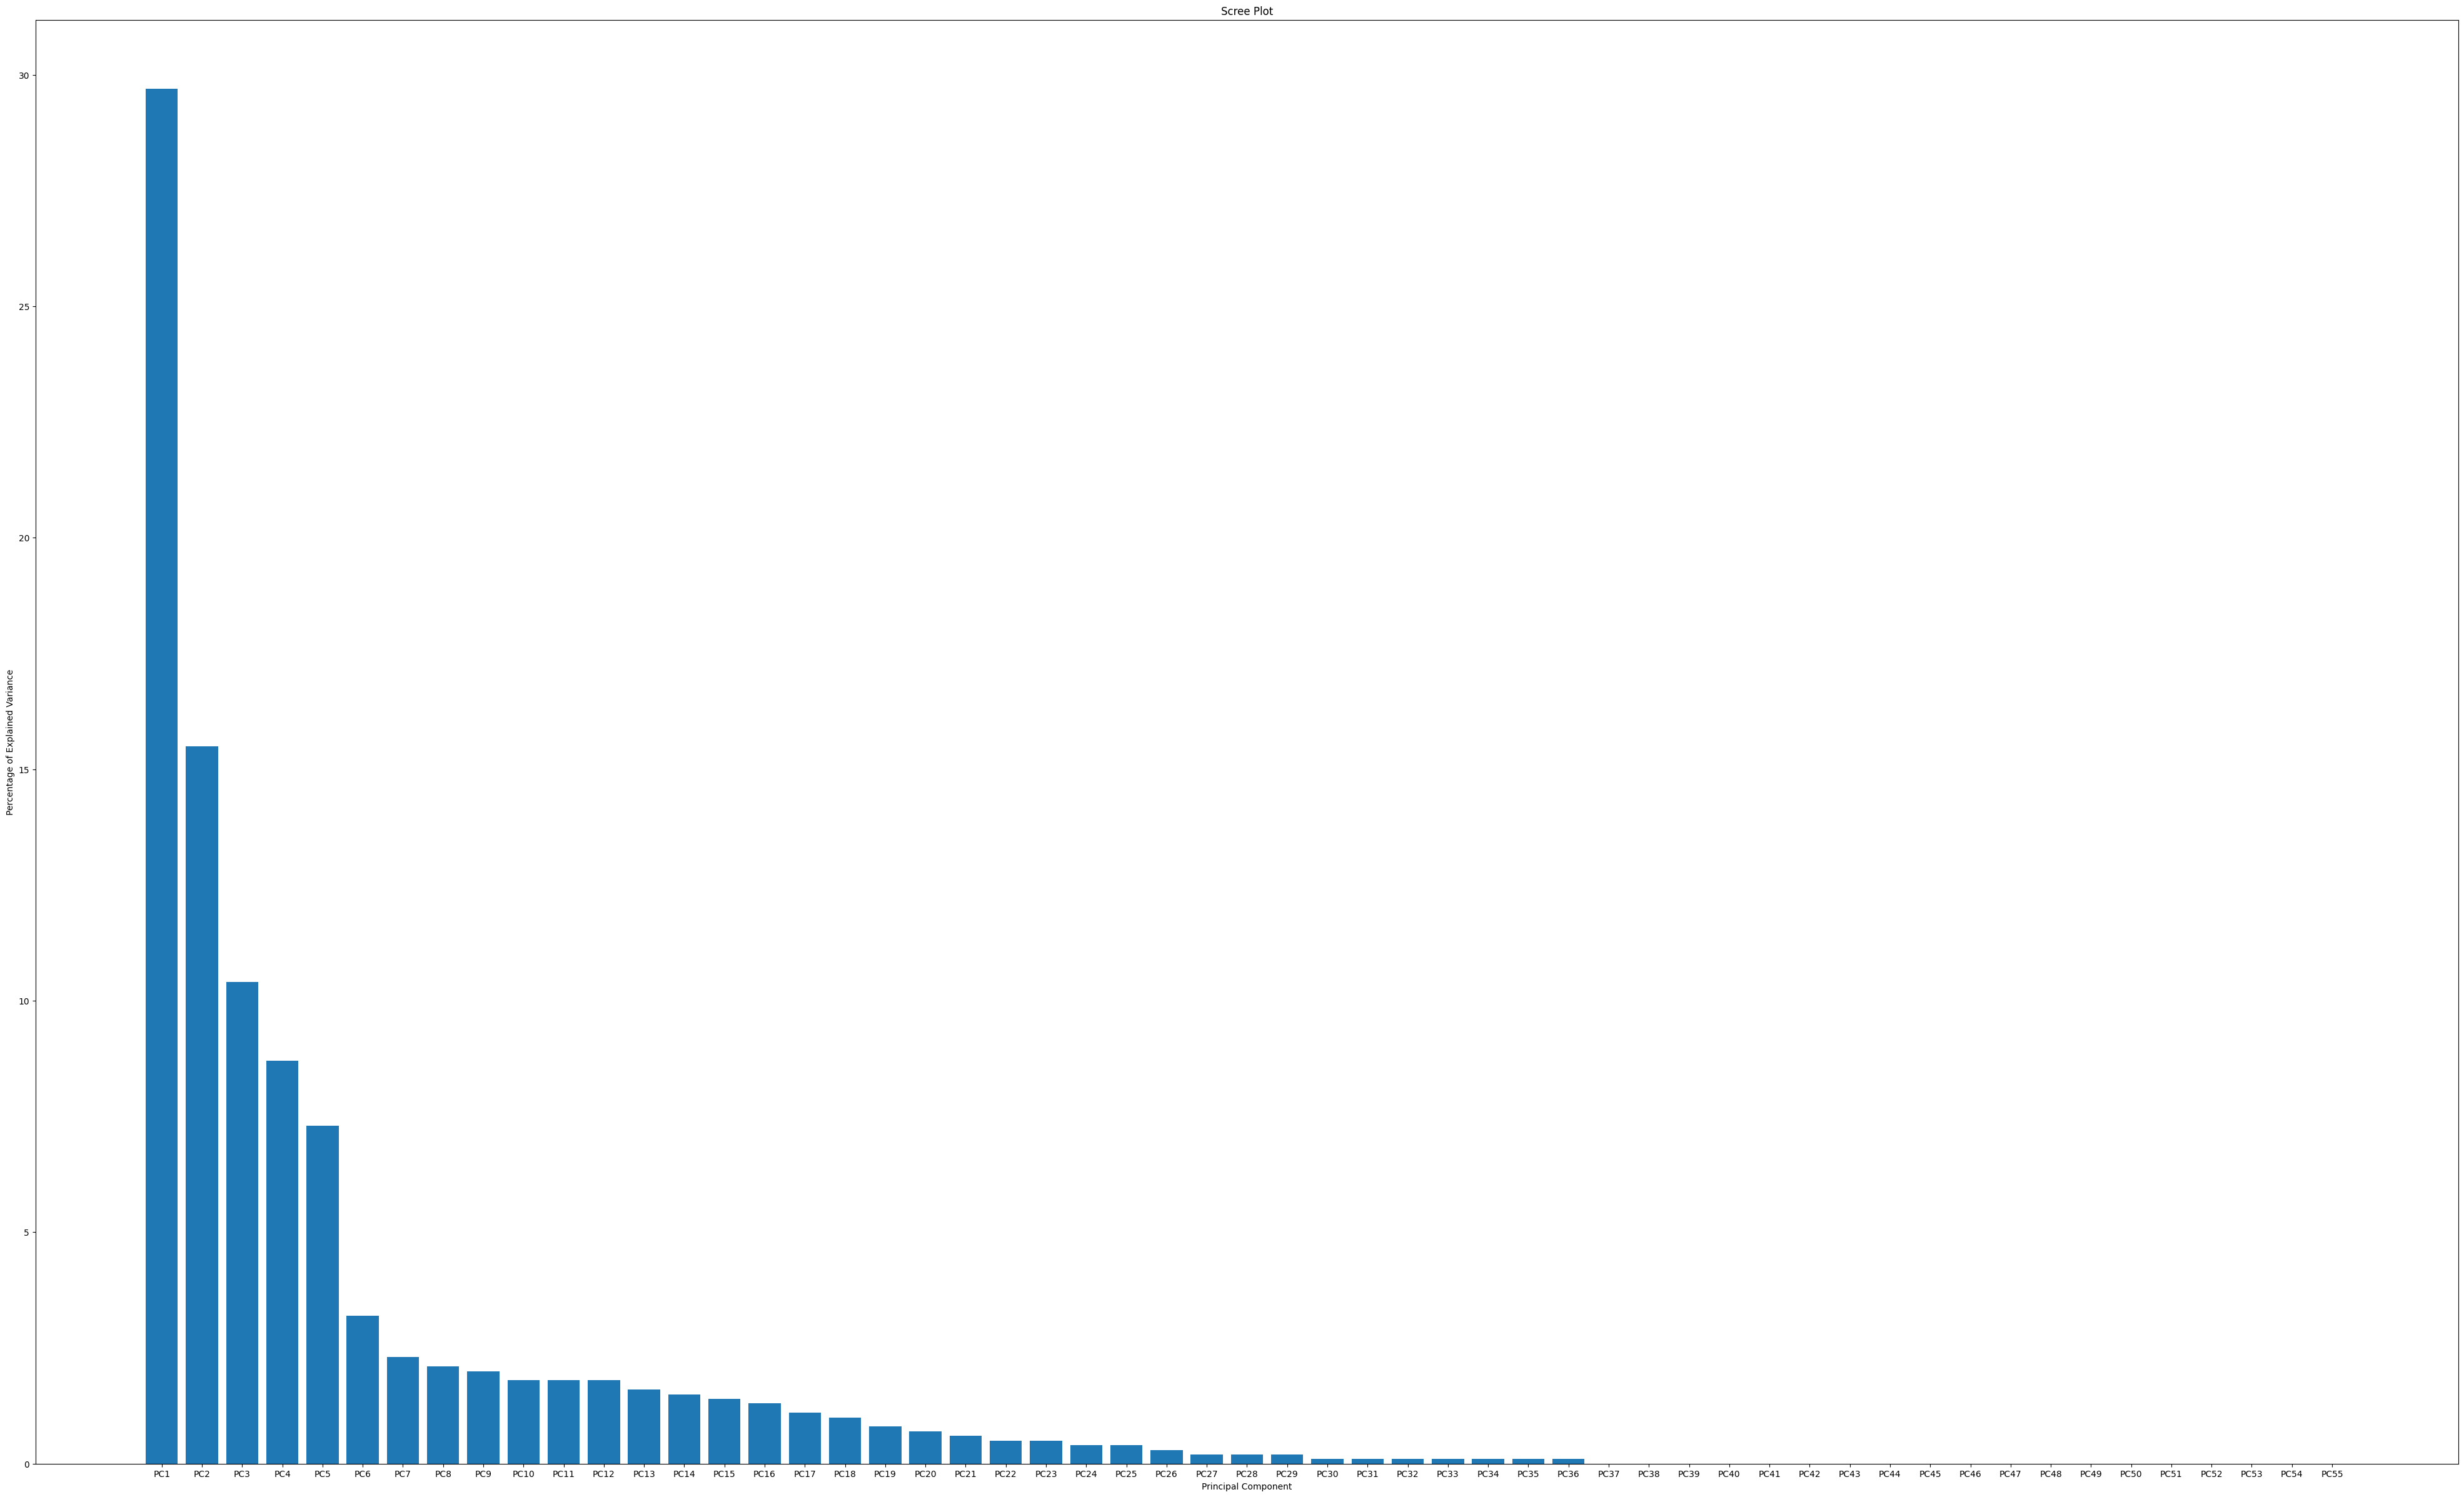

In [32]:
import numpy as np
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(50, 30))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [26]:
e = pca.explained_variance_ratio_

In [30]:
e[0] + e[1] + e[2] + e[3] + e[4] + e[5] + e[7] + e[8] + e[9]

0.8074826907140051

In [33]:
pca_df = pd.DataFrame(pca_data, columns=labels)


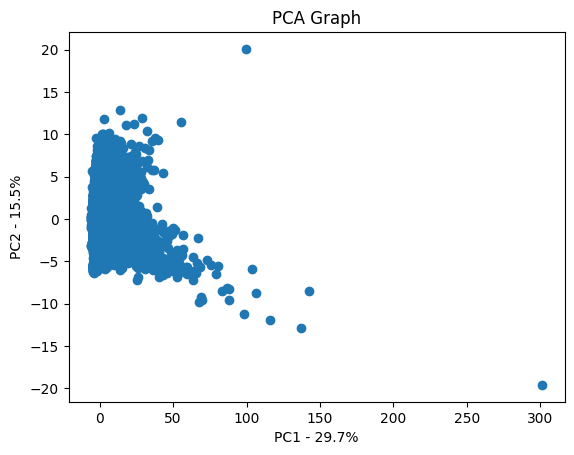

In [39]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel(f'PC1 - {per_var[0]}%')
plt.ylabel(f'PC2 - {per_var[1]}%')
plt.show()

In [19]:
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10 = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10])

5     0.212087
2     0.206205
4     0.206205
11    0.205571
12    0.205571
10    0.205340
13    0.204893
41    0.203783
32    0.201198
34    0.200345
dtype: float64


In [37]:
col_names[top_10]

Index(['perimeter', 'building_area', 'area', 'calculated_gfs', 'calculated_ls',
       'body_volume', 'roof_area', 'height_mean', 'storeys_model', 'storeys'],
      dtype='object')

In [38]:
col_names

Index(['latitude', 'longitude', 'building_area', 'building_part_count', 'area',
       'perimeter', 'npi', 'npi_norm', 'footprint_vertices', 'n_neighbour',
       'body_volume', 'calculated_gfs', 'calculated_ls', 'roof_area',
       'roof_coverage', 'roof_volume', 'roof_surface_count', 'roof_z_min',
       'roof_z_max', 'roof_pitch_mean', 'roof_pitch_min', 'roof_pitch_max',
       'roof_pitch_var', 'roof_triangle_count', 'flat_roof', 'flat_roof_ratio',
       'roof_height_mean', 'roof_height_min', 'roof_height_max',
       'roof_height_relative', 'measured_height', 'storeys_alkis',
       'storeys_model', 'storeys_calculated', 'storeys', 'ceiling_height',
       'storeys_under_roof', 'living_space_calculated',
       'gross_floor_space_calculated', 'height_max', 'body_height',
       'height_mean', 'terrain_height', 'eave_height_mean',
       'ridge_height_mean', 'terrain_surface_area', 'terrain_z_min',
       'terrain_z_median', 'terrain_z_max', 'terrain_pitch_mean',
       'terrain_p